In [41]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [42]:
# Load the dataset
data = pd.read_csv('heart.csv')

In [43]:
# Preprocess the features and target
features = data.drop('HeartDisease', axis=1)
target = data['HeartDisease']

In [44]:
features.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [45]:
target.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [47]:
cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
oe = OrdinalEncoder()

X_train[cat_variables] = oe.fit_transform(X_train[cat_variables])
X_test[cat_variables] = oe.transform(X_test[cat_variables])


In [48]:
mm_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
min_max = MinMaxScaler()

X_train[mm_variables] = min_max.fit_transform(X_train[mm_variables])
X_test[mm_variables] = min_max.transform(X_test[mm_variables])
    
features.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [49]:
model = RandomForestClassifier(n_estimators=250, max_depth=6, class_weight='balanced', min_samples_leaf= 3, min_samples_split=18, random_state=42)

In [50]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=3,
                       min_samples_split=18, n_estimators=250, random_state=42)

In [51]:
model.score(X_test, y_test)

0.894927536231884

In [52]:
predictions = model.predict(X_test)

In [53]:
accuracy_score(y_test, predictions)

0.894927536231884

In [54]:
conf_matrix = confusion_matrix(y_test, predictions)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       112
           1       0.93      0.89      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.90      0.89       276
weighted avg       0.90      0.89      0.90       276



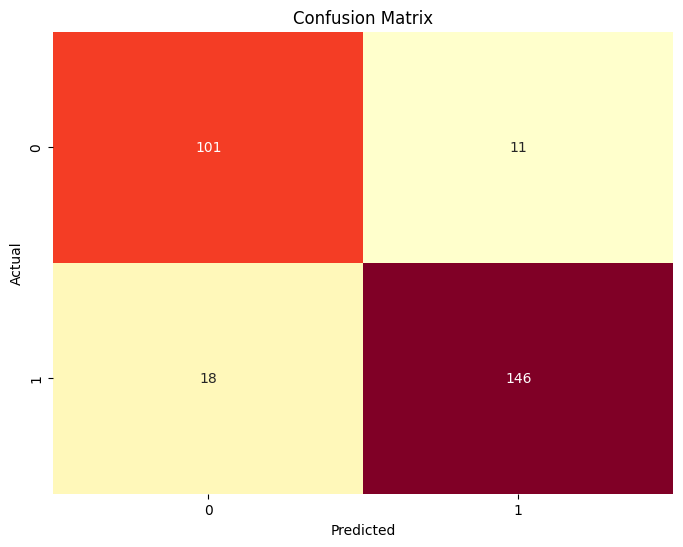

In [56]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

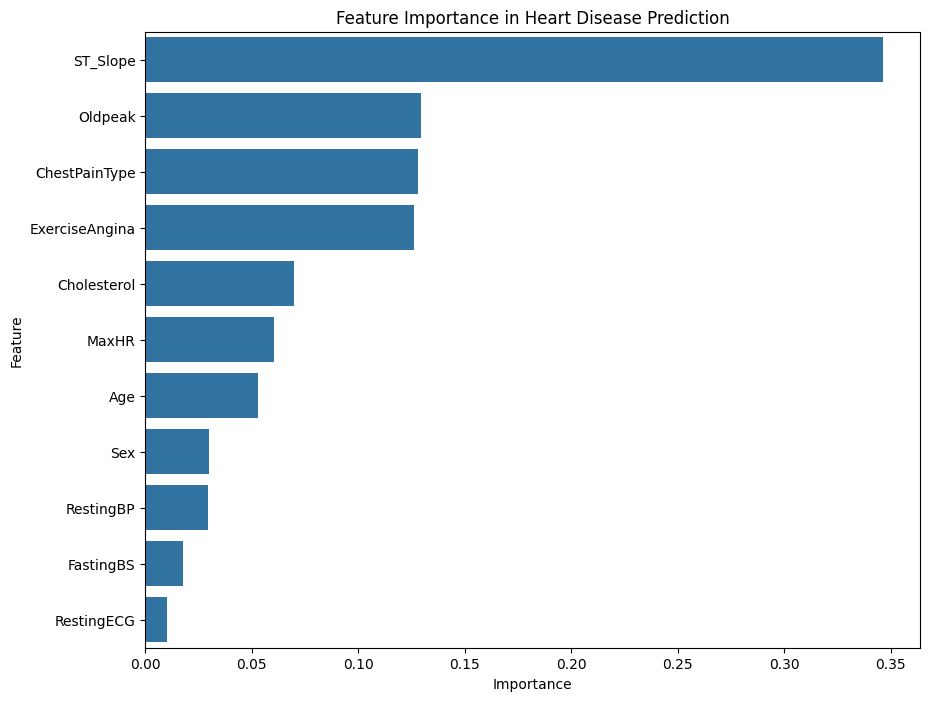

In [57]:
importances = model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Heart Disease Prediction')
plt.show()

In [58]:
heart_model = open('heart_model.pkl', 'wb')
pickle.dump(model, heart_model)
heart_model.close()

In [59]:
ordinal = open('oe.pkl', 'wb')
pickle.dump(oe, ordinal)
ordinal.close()

In [60]:
mmax = open('mm.pkl', 'wb')
pickle.dump(min_max, mmax)
mmax.close()